In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('results.csv')
columns = df.columns
columns

Index(['Unnamed: 0', 'c_cuda_vecsum', 'c_cpu_vecsum', 'numpy_vecsum'], dtype='object')

In [4]:
df2 = pd.read_csv('torch.csv')
df2.columns

Index(['Unnamed: 0', 'pytorch_cuda_vecsum', 'c_cpu_vecsum', 'numpy_vecsum'], dtype='object')

In [12]:
array_sizes = [2 ** i for i in range(7, 26)]

In [17]:
table = pd.concat([df.iloc[:, 1:], df2['pytorch_cuda_vecsum']], axis=1)

In [23]:
table = table.set_index(pd.Index(array_sizes), 'VectorLength')

In [32]:
table.multiply(1000).round(3).to_csv('rounded_results.csv')

In [39]:
df = pd.read_csv('rounded_results.csv')
columns = ['VectorLength'] + list(df.columns[1:])
print(columns)
df.columns = columns

['VectorLength', 'c_cuda_vecsum', 'c_cpu_vecsum', 'numpy_vecsum', 'pytorch_cuda_vecsum']


In [40]:
df

VectorLength  c_cuda_vecsum  c_cpu_vecsum  numpy_vecsum  \
0            128          0.187         0.002         0.005   
1            256          0.163         0.003         0.005   
2            512          0.161         0.005         0.005   
3           1024          0.170         0.008         0.007   
4           2048          0.181         0.016         0.005   
5           4096          0.174         0.032         0.006   
6           8192          0.179         0.065         0.007   
7          16384          0.191         0.137         0.014   
8          32768          0.209         0.276         0.011   
9          65536          0.219         0.508         0.018   
10        131072          0.236         1.110         0.031   
11        262144          0.279         2.244         0.074   
12        524288          0.338         4.499         0.149   
13       1048576          0.429         9.137         0.308   
14       2097152          0.672        18.422         0.484   
15       4194304          1.136        36.423         1.245   
16       8388608          2.289        73.750         2.661   
17      16777216          4.401       178.906         5.670   
18      33554432          8.588       359.306        11.498   

    pytorch_cuda_vecsum  
0                 0.059  
1                 0.047  
2                 0.040  
3                 0.035  
4                 0.034  
5                 0.035  
6                 0.038  
7                 0.043  
8                 0.055  
9                 0.082  
10                0.132  
11                0.225  
12                0.332  
13                0.515  
14                0.944  
15                1.918  
16                4.047  
17                7.759  
18               15.516

In [42]:
df.to_html('html_table.html', index=None)

In [43]:
name2beauty_name = {
    'c_cuda_vecsum': 'Cython CUDA Kernel',
    'c_cpu_vecsum': 'Cython CPU',
    'numpy_vecsum': 'Python Numpy',
    'pytorch_cuda_vecsum': 'Python GPU Pytorch',
}

In [44]:
data = df.values

In [45]:
data[::, 1]

array([0.187, 0.163, 0.161, 0.17 , 0.181, 0.174, 0.179, 0.191, 0.209,
       0.219, 0.236, 0.279, 0.338, 0.429, 0.672, 1.136, 2.289, 4.401,
       8.588])

In [60]:
array_sizes_str = [f"{i}" for i in range(7, 26)]

In [61]:
def draw_plot(iterator, title):
    fig = plt.figure(figsize=(12, 12))
    for i in iterator:
        plt.plot(data[::, i], '-o', label=name2beauty_name[columns[i]])
    plt.title(title)
    plt.xlabel("Array length (2^)")
    plt.ylabel("Time (ms.)")
    plt.xticks(np.arange(0, len(array_sizes)), array_sizes_str)

    plt.grid()
    plt.legend()
    
    fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

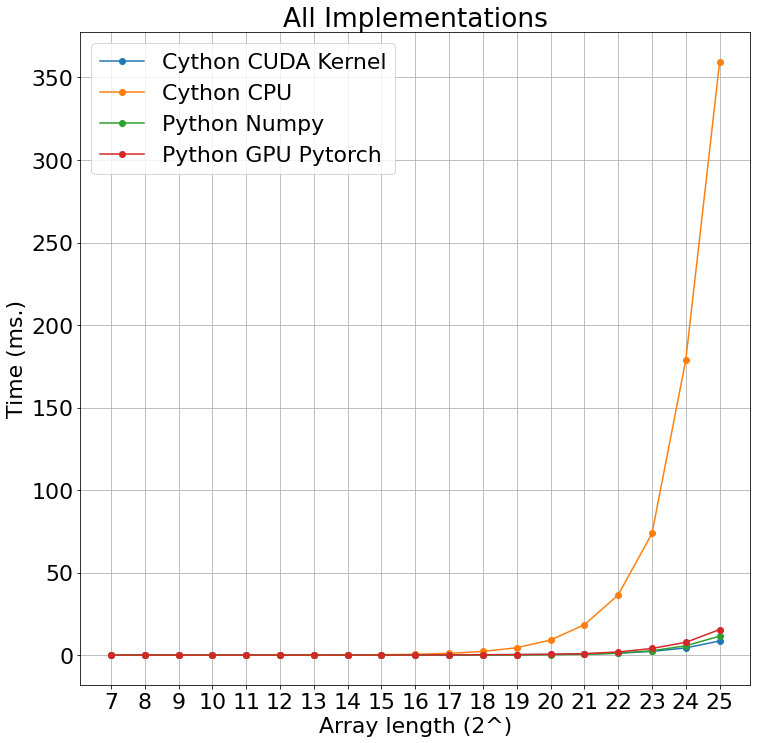

In [62]:
draw_plot(range(1, data.shape[1]), "All Implementations")

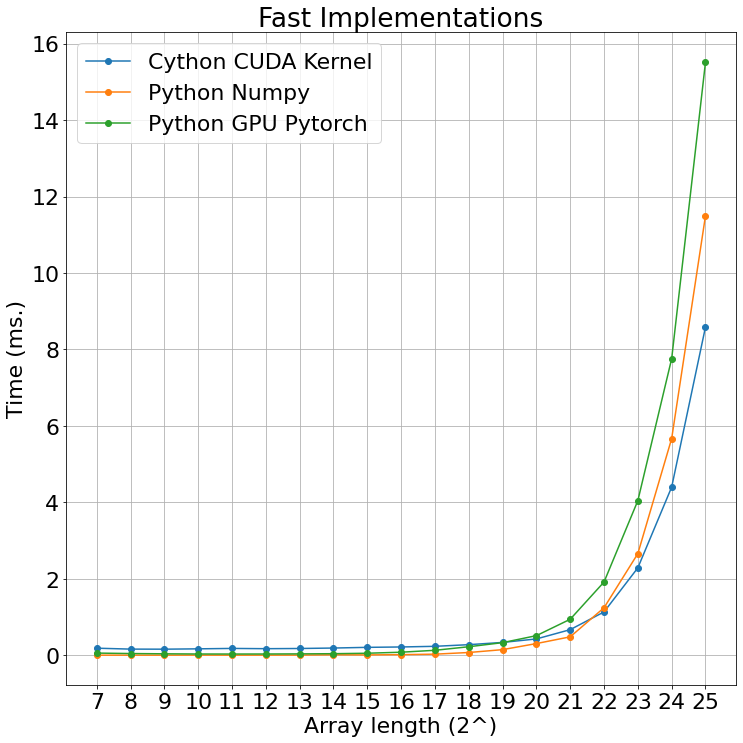

In [63]:
draw_plot([1, 3, 4], "Fast Implementations")

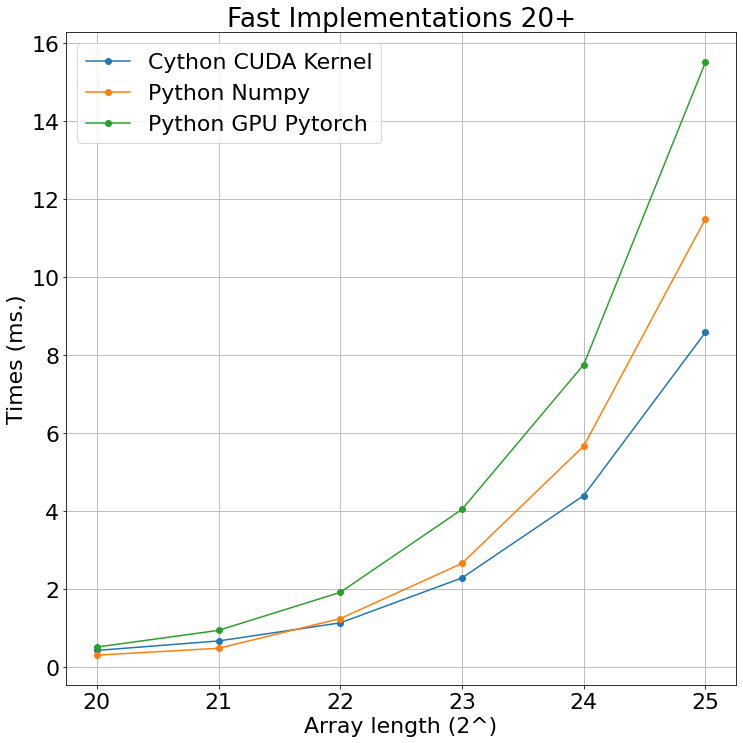

In [69]:
title = "Fast Implementations 20+"
fig = plt.figure(figsize=(12, 12))

for i in [1, 3, 4]:
    plt.plot(np.arange(0, 6), data[-6:, i], '-o', label=name2beauty_name[columns[i]])
    
plt.title(title)
plt.xlabel("Array length (2^)")
plt.ylabel("Times (ms.)")
plt.xticks(np.arange(0, 6), array_sizes_str[-6:])
plt.grid()
plt.legend()

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

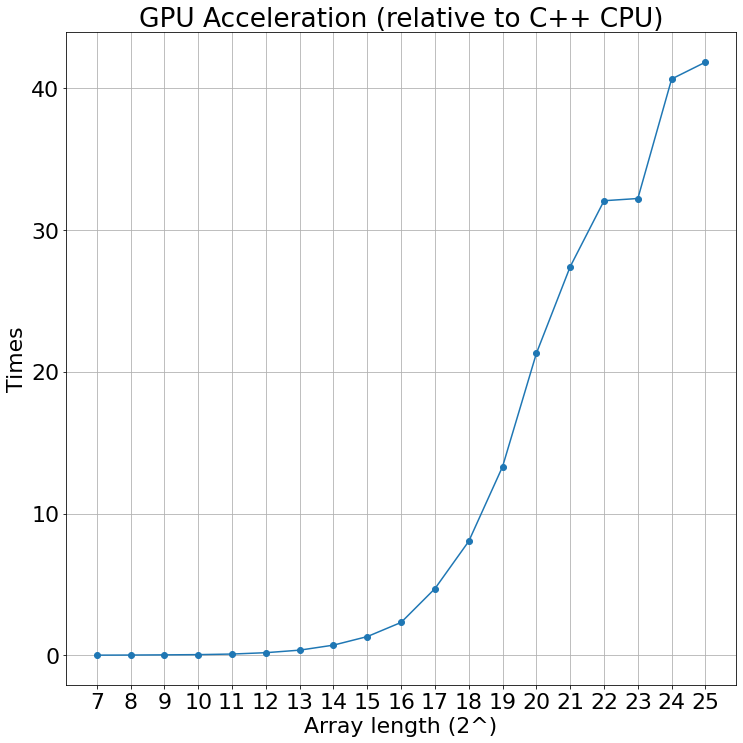

In [76]:
title = "GPU Acceleration (relative to C++ CPU)"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_sizes)), data[::, 2] / data[::, 1], '-o')
    
plt.title(title)
plt.xlabel("Array length (2^)")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_sizes)), array_sizes_str)
plt.grid()

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

In [81]:
!chmod -R +777 ../